In [1]:
import numpy as np
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
data = pd.read_csv("Expander_data.csv")
data.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,01-04-2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,01-04-2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,01-04-2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,01-04-2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,01-04-2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


# ==>Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 9 columns):
Timestamp                     296450 non-null object
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
Run Status                    0 non-null float64
dtypes: float64(8), object(1)
memory usage: 20.4+ MB


In [4]:
data.describe()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
count,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,0.0
mean,590.541350,-231.564934,8119.917777,2955.416695,2.005667,186.991087,-229.764934,NaN
std,23.216552,3.574107,398.049531,54.201467,2.488568,56.205183,3.574136,NaN
min,552.420048,-238.594971,7056.004500,2835.750571,-0.200000,69.983885,-236.816223,NaN
25%,572.757269,-234.171427,7916.322054,2906.336126,0.000000,143.468467,-232.371760,NaN
50%,586.491792,-230.922352,8144.161813,2961.788792,0.000000,183.270451,-229.122946,NaN
75%,605.986608,-229.585168,8388.610374,3000.863611,4.000000,223.580205,-227.785796,NaN
max,649.217417,-223.440125,8975.986378,3090.367995,8.026667,324.411576,-221.617102,NaN


In [5]:
data.shape

(296450, 9)

In [6]:
data.isnull().sum()  

Timestamp                          0
Suction Pressure (psig)            0
Suction Temperature (F)            0
Total Flow (gpm)                   0
Speed (rpm)                        0
By-pass Valve Position (%)         0
Discharge Pressure (psig)          0
Discharge Temperature (F)          0
Run Status                    296450
dtype: int64

In [7]:
#Dropping column "Run Status" as it is empty
data.drop('Run Status',axis=1,inplace=True)

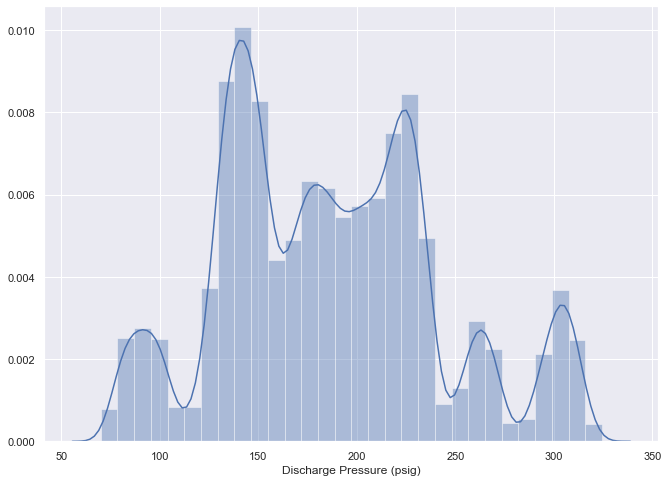

In [8]:
#Distribution plot of the Dependent variable Discharge Pressure (psig).
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(data['Discharge Pressure (psig)'], bins=30)
plt.show()

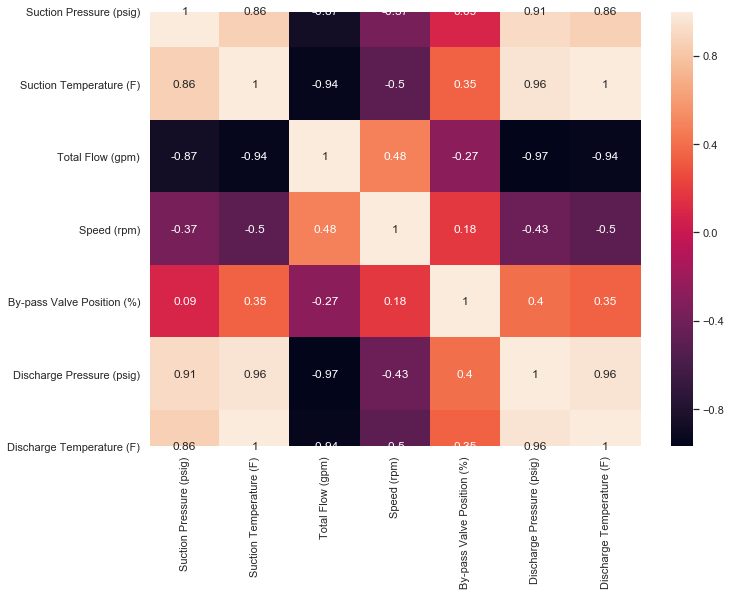

In [9]:
#Plotting correlation matrx along with the heatmap 
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

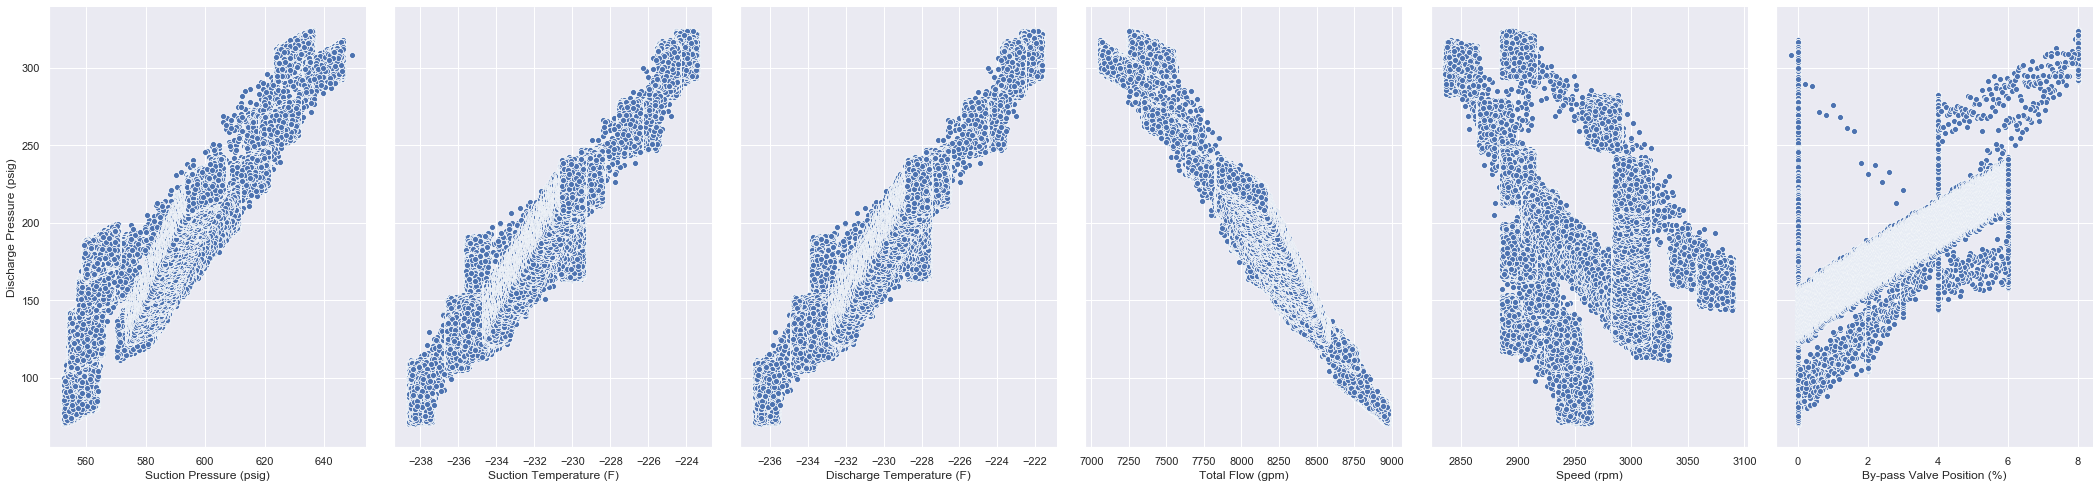

In [10]:
# Visualising the relationship between the features and the DEPENDENT variable using scatterplots
sns.pairplot(data, x_vars=['Suction Pressure (psig)','Suction Temperature (F)','Discharge Temperature (F)','Total Flow (gpm)','Speed (rpm)','By-pass Valve Position (%)'], 
             y_vars='Discharge Pressure (psig)',size=7, aspect=0.7, kind='scatter')

# ==>Variable Selection

# 1)Predictor Variables as:
--Suction Pressure,Suction Temperature,Total Flow,Discharge Temperature,Speed,By-pass Valve


In [11]:
#Defining the Dependent & Independent model.
X = pd.DataFrame(np.c_[data['Suction Pressure (psig)'], data['Suction Temperature (F)'], data['Total Flow (gpm)'], data['Discharge Temperature (F)'],data['Speed (rpm)'],data['By-pass Valve Position (%)']], columns = ['Suction Pressure','Suction Temperature','Total Flow','Discharge Temperature','Speed','By-pass Valve Position']) 
y = data['Discharge Pressure (psig)']

In [12]:
#Splitting the data into Training & Testing set.
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

import statsmodels.api as sm  
X_train_sm = X_train 
y_train_sm = y_train
X_train_sm = sm.add_constant(X_train_sm)
lm_1 = sm.OLS(y_train_sm, X_train_sm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Discharge Pressure (psig)   R-squared:                       0.998
Model:                                   OLS   Adj. R-squared:                  0.998
Method:                        Least Squares   F-statistic:                 2.063e+07
Date:                       Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                               23:28:15   Log-Likelihood:            -5.4973e+05
No. Observations:                     237160   AIC:                         1.099e+06
Df Residuals:                         237153   BIC:                         1.100e+06
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    626.0921      1.315    476.034      0.000     623.514     628.670
Suction Pressure           0.9061      0.001   1609.618      0.000       0.905       0.907
Suction Temperature        1.0312      0.380      2.714      0.007       0.287       1.776
Total Flow                -0.0705   3.98e-05  -1771.518      0.000      -0.071      -0.070
Discharge Temperature     -0.0756      0.380     -0.199      0.842      -0.820       0.669
Speed                     -0.0645      0.000   -489.492      0.000      -0.065      -0.064
By-pass Valve Position     4.9604      0.003   1697.484      0.000       4.955       4.966
==============================================================================
Omnibus:                    35321.573   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69928.361
Skew:                          -0.925   Prob(JB):                         0.00
Kurtosis:                       4.912   Cond. No.                     2.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2)Predictor Variables as:
--Suction Pressure,Suction Temperature,Total Flow.

In [13]:
X = pd.DataFrame(np.c_[data['Suction Pressure (psig)'], data['Suction Temperature (F)'], data['Total Flow (gpm)']], columns = ['Suction Pressure','Suction Temperature','Total Flow']) 
y = data['Discharge Pressure (psig)']

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

import statsmodels.api as sm  
X_train_sm = X_train 
y_train_sm = y_train
X_train_sm = sm.add_constant(X_train_sm)
lm_1 = sm.OLS(y_train_sm, X_train_sm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Discharge Pressure (psig)   R-squared:                       0.972
Model:                                   OLS   Adj. R-squared:                  0.972
Method:                        Least Squares   F-statistic:                 2.782e+06
Date:                       Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                               23:28:16   Log-Likelihood:            -8.6642e+05
No. Observations:                     237160   AIC:                         1.733e+06
Df Residuals:                         237156   BIC:                         1.733e+06
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1720.2625      3.537    486.296      0.000    1713.329    1727.196
Suction Pressure        0.4186      0.002    238.682      0.000       0.415       0.422
Suction Temperature     5.1341      0.016    319.111      0.000       5.103       5.166
Total Flow             -0.0729      0.000   -485.970      0.000      -0.073      -0.073
==============================================================================
Omnibus:                    24999.618   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22915.005
Skew:                           0.690   Prob(JB):                         0.00
Kurtosis:                       2.358   Cond. No.                     1.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3)Predictor Variables as:
--Suction Pressure,Suction Temperature,Total Flow,Speed,By-pass Valve

In [15]:
X = pd.DataFrame(np.c_[data['Suction Pressure (psig)'], data['Suction Temperature (F)'], data['Total Flow (gpm)'],data['Speed (rpm)'],data['By-pass Valve Position (%)']], columns = ['Suction Pressure','Suction Temperature','Total Flow','Speed','By-pass Valve position']) 
y = data['Discharge Pressure (psig)']

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

import statsmodels.api as sm  
X_train_sm = X_train 
y_train_sm = y_train
X_train_sm = sm.add_constant(X_train_sm)
lm_1 = sm.OLS(y_train_sm, X_train_sm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Discharge Pressure (psig)   R-squared:                       0.998
Model:                                   OLS   Adj. R-squared:                  0.998
Method:                        Least Squares   F-statistic:                 2.476e+07
Date:                       Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                               23:28:16   Log-Likelihood:            -5.4973e+05
No. Observations:                     237160   AIC:                         1.099e+06
Df Residuals:                         237154   BIC:                         1.100e+06
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    625.9560      1.124    557.040      0.000     623.754     628.158
Suction Pressure           0.9061      0.001   1609.622      0.000       0.905       0.907
Suction Temperature        0.9555      0.005    187.273      0.000       0.946       0.966
Total Flow                -0.0705   3.98e-05  -1771.522      0.000      -0.071      -0.070
Speed                     -0.0645      0.000   -489.493      0.000      -0.065      -0.064
By-pass Valve position     4.9604      0.003   1697.487      0.000       4.955       4.966
==============================================================================
Omnibus:                    35321.727   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69928.769
Skew:                          -0.925   Prob(JB):                         0.00
Kurtosis:                       4.912   Cond. No.                     1.93e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Training the model

# ==>Using Linear Regression

In [17]:
#Training and testing the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predicting the Test set Result
Y_pred = regressor.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [19]:
r_squared = regressor.score(X_test, y_test)
MSE = mean_squared_error(y_test, Y_pred)
RMSE = sqrt(MSE)

In [20]:
print("R-squared: {}".format(r_squared))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))

R-squared: 0.9980952682433858
MSE: 6.02746288819306
RMSE: 2.4550891813115587


# ==>Using Ridge Regression

In [21]:
from sklearn.linear_model import Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 

In [22]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X, y,scoring="neg_mean_squared_error", cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
 # Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

0.25 : -1035.2183624620034
0.5 : -1035.2180039484615
0.75 : -1035.2176454383186
1.0 : -1035.217286931602
1.25 : -1035.2169284282793
1.5 : -1035.216569928362
1.75 : -1035.2162114318303
2.0 : -1035.2158529387473


In [23]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(X_train, y_train) 
Y_pred = ridgeModelChosen.predict(X_test) 

In [24]:
R_Squared = ridgeModelChosen.score(X_test, y_test)
MSE = mean_squared_error(y_test, Y_pred)
RMSE = sqrt(MSE)

In [25]:
print("R_squared: {}".format(r_squared))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))

R_squared: 0.9980952682433858
MSE: 6.027463567824153
RMSE: 2.455089319724265


# ==>Using Lasso Regression

In [26]:
# List to maintain the different cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ls = Lasso(alpha = i * 0.25) 
    ls.fit(X_train, y_train) 
    scores = cross_val_score(ls, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
  # Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 

0.25 : 96.03310759510151
0.5 : 95.62938630103103
0.75 : 95.17564735970538
1.0 : 94.69018532744475
1.25 : 94.18376649549202
1.5 : 93.63979291449304
1.75 : 93.03301820830865
2.0 : 92.34153197050671


In [27]:
lsChosen = Lasso(alpha=2) 
lsChosen.fit(X_train,y_train)
Y_pred = lsChosen.predict(X_test)

In [28]:
R_Squared = lsChosen.score(X_test, y_test)
MSE = mean_squared_error(y_test, Y_pred)
RMSE = sqrt(MSE) 

In [29]:
print("R-squared: {}".format(r_squared))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))

R-squared: 0.9980952682433858
MSE: 8.156821551199178
RMSE: 2.856014977411564


# ==>Comparing Results of Linear, Ridge, Lasso Regression

# ==>Selecting LINEAR REGRESSION
OBSERVATION:
As the R-quared value for the Linear regression is Highest and the MSE is the lowest among other models, we will select Linear Regression model over other.

In [30]:
#Training and testing the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)
#Predicting the Test set Result
Y_pred = regressor.predict(X_test)

# ==>Data Evaluation.

In [31]:
r_squared = regressor.score(X_test, y_test)
MSE = mean_squared_error(y_test, Y_pred)
RMSE = sqrt(MSE)
print("R-squared: {}".format(r_squared))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))

R-squared: 0.9980952682433858
MSE: 6.02746288819306
RMSE: 2.4550891813115587


In [32]:
import statsmodels.api as sm  
X_train_sm = X_train 
y_train_sm = y_train
X_train_sm = sm.add_constant(X_train_sm)
lm_1 = sm.OLS(y_train_sm, X_train_sm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Discharge Pressure (psig)   R-squared:                       0.998
Model:                                   OLS   Adj. R-squared:                  0.998
Method:                        Least Squares   F-statistic:                 2.476e+07
Date:                       Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                               23:29:10   Log-Likelihood:            -5.4973e+05
No. Observations:                     237160   AIC:                         1.099e+06
Df Residuals:                         237154   BIC:                         1.100e+06
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    625.9560      1.124    557.040      0.000     623.754     628.158
Suction Pressure           0.9061      0.001   1609.622      0.000       0.905       0.907
Suction Temperature        0.9555      0.005    187.273      0.000       0.946       0.966
Total Flow                -0.0705   3.98e-05  -1771.522      0.000      -0.071      -0.070
Speed                     -0.0645      0.000   -489.493      0.000      -0.065      -0.064
By-pass Valve position     4.9604      0.003   1697.487      0.000       4.955       4.966
==============================================================================
Omnibus:                    35321.727   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69928.769
Skew:                          -0.925   Prob(JB):                         0.00
Kurtosis:                       4.912   Cond. No.                     1.93e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ==>Data Visualization
Comparing the predicted value of DEPENDET VARIABLE(Discharge Pressure (psig)) with the actual value from Test set.

In [33]:
#Now compare the actual output values for Test set with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
df.head(10)

,Actual,Predicted
274757,221.108163,220.495027
58464,96.832460,100.019879
220708,150.666488,152.828846
185529,132.827629,134.710708
86203,187.056908,185.791248
174949,139.102745,139.922757
198950,130.097090,130.204460
95538,178.552287,178.153638
59281,101.800078,103.265636
61377,84.155429,87.283580


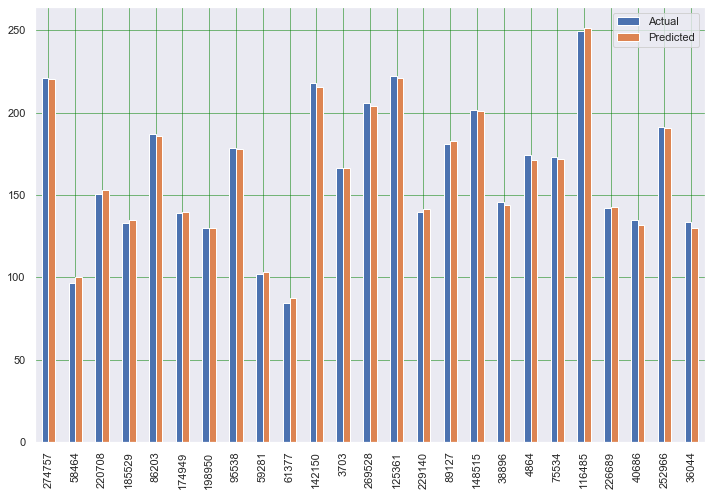

In [34]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

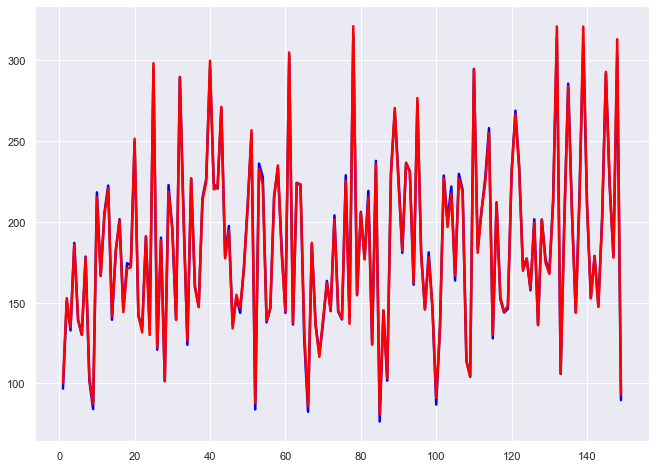

In [35]:
a = [i for i in range(1,150,1)] #For 1st 150 values

fig = plt.figure()

plt.plot(a, y_test[1:150], color="blue",linewidth=2.5,linestyle="-") #Test Data
plt.plot(a, Y_pred[1:150], color="red",linewidth=2.5,linestyle="-") #Predictaed Data

# ==>CONCLUSION

Thus the target variable (Descharge Pressure) is predicted using the following predictor variables (Suction Pressure,Suction Temperature,Total Flow,Speed,By-pass Valve position)
with the coefficient of determination value as 0.988 and mean squared error as 2.45